<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Kaggle練習用" data-toc-modified-id="Kaggle練習用-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Kaggle練習用</a></span><ul class="toc-item"><li><span><a href="#参考情報" data-toc-modified-id="参考情報-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>参考情報</a></span></li></ul></li><li><span><a href="#データの準備" data-toc-modified-id="データの準備-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>データの準備</a></span><ul class="toc-item"><li><span><a href="#欠損データの補修" data-toc-modified-id="欠損データの補修-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>欠損データの補修</a></span><ul class="toc-item"><li><span><a href="#年齢を適当な推定値で補修" data-toc-modified-id="年齢を適当な推定値で補修-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>年齢を適当な推定値で補修</a></span></li><li><span><a href="#Embarked（乗船した）-を固定値(S)で補修" data-toc-modified-id="Embarked（乗船した）-を固定値(S)で補修-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Embarked（乗船した） を固定値(S)で補修</a></span></li><li><span><a href="#Fare(料金)を平均値で補修" data-toc-modified-id="Fare(料金)を平均値で補修-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Fare(料金)を平均値で補修</a></span></li><li><span><a href="#Cabinの削除" data-toc-modified-id="Cabinの削除-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Cabinの削除</a></span></li></ul></li><li><span><a href="#Converting-Categorical-Feature" data-toc-modified-id="Converting-Categorical-Feature-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Converting Categorical Feature</a></span></li><li><span><a href="#不要な特徴を削除" data-toc-modified-id="不要な特徴を削除-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>不要な特徴を削除</a></span></li><li><span><a href="#入力と正解に分離" data-toc-modified-id="入力と正解に分離-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>入力と正解に分離</a></span></li></ul></li><li><span><a href="#学習開始" data-toc-modified-id="学習開始-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>学習開始</a></span><ul class="toc-item"><li><span><a href="#ヘルパー関数" data-toc-modified-id="ヘルパー関数-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>ヘルパー関数</a></span></li><li><span><a href="#ランダムフォレスト" data-toc-modified-id="ランダムフォレスト-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>ランダムフォレスト</a></span></li><li><span><a href="#ロジスティック回帰" data-toc-modified-id="ロジスティック回帰-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>ロジスティック回帰</a></span></li><li><span><a href="#NN" data-toc-modified-id="NN-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>NN</a></span></li></ul></li><li><span><a href="#訓練用データを全部使って学習" data-toc-modified-id="訓練用データを全部使って学習-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>訓練用データを全部使って学習</a></span></li><li><span><a href="#提出用データ作成" data-toc-modified-id="提出用データ作成-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>提出用データ作成</a></span></li></ul></div>

# Kaggle練習用

## 参考情報
* Titanic (Classification Regression) https://www.kaggle.com/fatmakursun/titanic-classification-regression

# データの準備

In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

In [2]:
df_test = pd.read_csv('data/test.csv') 
df_train = pd.read_csv('data/train.csv')
df_gender_submission = pd.read_csv('data/gender_submission.csv') # 解答サンプル

In [3]:
df_train_back = df_train.copy()
df_test_back = df_test.copy()

In [4]:
df_train_back.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train_back.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 欠損データの補修
* Age : それっぽい値で代用
* Embarked : 固定値（S)
* Cabin : 欠損数多につきdrop
* Fare(testデータのみ) : 平均値

In [6]:
# 未記入のデータを数える
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### 年齢を適当な推定値で補修

In [8]:
"""
imr = SimpleImputer(missing_values=np.nan, strategy='mean') #平均補完
imr = imr.fit(df_train[['Age']])
df_train[['Age']] = imr.transform(df_train[['Age']])
"""

"\nimr = SimpleImputer(missing_values=np.nan, strategy='mean') #平均補完\nimr = imr.fit(df_train[['Age']])\ndf_train[['Age']] = imr.transform(df_train[['Age']])\n"

In [9]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [10]:
df_train['Age'] = df_train[['Age','Pclass']].apply(impute_age,axis=1)
df_test['Age'] = df_test[['Age','Pclass']].apply(impute_age,axis=1)

### Embarked（乗船した） を固定値(S)で補修

In [11]:
df_train['Embarked'] = df_train['Embarked'].fillna('S')
df_test['Embarked'] = df_test['Embarked'].fillna('S')

### Fare(料金)を平均値で補修

In [12]:
df_test['Fare'] = df_test[['Fare']].fillna(df_train[['Fare']].mean())  # Trainで平均値を計算

### Cabinの削除

In [13]:
df_train.drop('Cabin',axis=1,inplace=True)
df_test.drop('Cabin',axis=1,inplace=True)

In [14]:
df_train[['Age','Embarked']].isnull().sum()

Age         0
Embarked    0
dtype: int64

In [15]:
df_test[['Age','Embarked','Fare']].isnull().sum()

Age         0
Embarked    0
Fare        0
dtype: int64

## Converting Categorical Feature
次の２項目を数値に変換
* Sex
* Embarked

In [16]:
"""
#LabelEncoderのインスタンスを生成
le = LabelEncoder()
#ラベルを覚えさせる
le = le.fit(df_train['Sex'])
print( le.classes_)
#ラベルを整数に変換
df_train.loc[:,'Sex'] = le.transform(df_train.loc[:,'Sex'])
df_test.loc[:,'Sex'] = le.transform(df_test.loc[:,'Sex'])
"""

"\n#LabelEncoderのインスタンスを生成\nle = LabelEncoder()\n#ラベルを覚えさせる\nle = le.fit(df_train['Sex'])\nprint( le.classes_)\n#ラベルを整数に変換\ndf_train.loc[:,'Sex'] = le.transform(df_train.loc[:,'Sex'])\ndf_test.loc[:,'Sex'] = le.transform(df_test.loc[:,'Sex'])\n"

In [17]:
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [18]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
def conv_cate_feat( df, cate_list ):
    for cate in cate_list:
        df_num = pd.get_dummies(df[cate],drop_first=True)
        df.drop([cate],axis=1,inplace=True) # カテゴリかるの方は削除して
        df = pd.concat( [df,df_num],axis=1) # 数値の方を追加       
    return df

In [20]:
df_train = conv_cate_feat( df_train, ['Sex','Embarked'])
df_test = conv_cate_feat( df_test, ['Sex','Embarked'])

In [21]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


In [22]:
df_test.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,1,1,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,0,0,1


## 不要な特徴を削除

In [23]:
df_train.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True) # colum 方向に縮退させるのでをaxis=1
df_pid_test = df_test[['PassengerId']] # 提出データ作成用に保存
df_test.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

## 入力と正解に分離

In [24]:
df_train_X = df_train.drop(['Survived'],axis=1)
df_train_y = df_train['Survived']
df_test_X = df_test

display( df_train_X.head())
display( df_test_X.head())
display( df_train_y.head() )

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# 学習開始

In [25]:
from sklearn.model_selection import cross_val_score

## ヘルパー関数

In [26]:
def get_acc( p_test, y_test ):
    acc = np.sum(y_test == p_test) / len(p_test)
    print( 'acc= %.4f' % acc )
    return acc

In [27]:
def exec_cv( estimator, X, y, cv=5, verbose=False ):
    scores = cross_val_score(estimator=estimator, X=X, y=y, cv=cv, n_jobs=4 )
    if verbose == True:
        print('CV accuracy scores: ', scores)
        print('CV accuracy: mean= %.4f, std= %.4f' % ( scores.mean(), scores.std() ))
    return scores

## ランダムフォレスト
Best Score:
mean= 0.8228 , std= 0.0249 n_estimators=500,criterion='entropy', max_depth= 4


In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
scores_acc = np.empty(0)
for i in range(10):
    clf= RandomForestClassifier(n_estimators=500,criterion='entropy', max_depth= 4, random_state=i)
    scores = exec_cv( clf, df_train_X, df_train_y )
    scores_acc = np.append( scores_acc, scores )
print( 'mean= %.4f , std= %.4f' % (scores_acc.mean(), scores_acc.std() ) )

mean= 0.8228 , std= 0.0249


## ロジスティック回帰

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=1000)
exec_cv( logmodel, df_train_X, df_train_y, verbose=True )

CV accuracy scores:  [0.77653631 0.81005587 0.80337079 0.76966292 0.81355932]
CV accuracy: mean= 0.7946, std= 0.0180


array([0.77653631, 0.81005587, 0.80337079, 0.76966292, 0.81355932])

## NN

In [32]:
import keras 
from keras.layers import Dense, Dropout
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
hist = None

Using TensorFlow backend.


In [33]:
X_train, X_vali, y_train, y_vali = train_test_split( df_train_X, df_train_y, test_size=0.3 )

scl = StandardScaler()
scl.fit(X_train)
X_train_scl = scl.transform(X_train)
X_vali_scl = scl.transform(X_vali)

In [34]:
#kinit='glorot_uniform' # Default
kinit = 'glorot_normal'
#kinit = 'he_normal'

act = 'relu'
#act = 'sigmoid'

input_shape = (X_train_scl.shape[1],)

ann = Sequential()

#ann.add(Dropout(0.2, input_shape=input_shape ))

ann.add(Dense(64,kernel_initializer=kinit, activation=act, input_shape=input_shape ) )
ann.add(Dropout(0.5))

ann.add(Dense(64,kernel_initializer=kinit, activation=act ) )
ann.add(Dropout(0.5))

ann.add(Dense(1,kernel_initializer=kinit, activation=act ) )
ann.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'] )

#ann.compile(optimizer='adam',loss='mean_squared_error', metrics=['accuracy'] )

ann.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                576       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 4,801
Trainable params: 4,801
Non-trainable p

In [35]:
history = ann.fit(X_train_scl,y_train, batch_size=64, epochs=2000, validation_data=(X_vali_scl, y_vali ), verbose=0 )

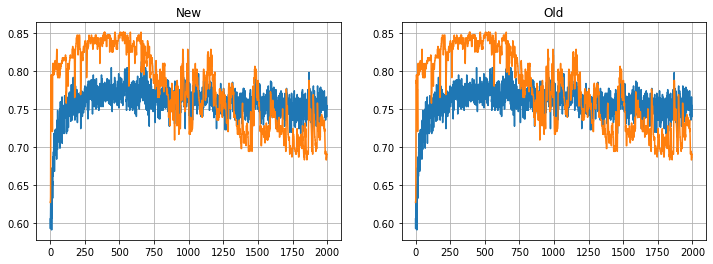

In [37]:
hist_back = hist
hist = history.history
plt.figure( figsize=(12,4) )

plt.subplot( 121 )
plt.plot( hist['acc'])
plt.plot( hist['val_acc'])
plt.grid()
plt.title( 'New')

if hist_back is not None:
    plt.subplot( 122 )
    plt.plot( hist_back['acc'])
    plt.plot( hist_back['val_acc'])
    plt.grid()
    plt.title( 'Old')


# 訓練用データを全部使って学習

In [32]:
clf= RandomForestClassifier(n_estimators=500,criterion='entropy', max_depth=4,random_state=0)
clf.fit( df_train_X, df_train_y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [33]:
print( 'Check by closed data' )
X_train, X_vali, y_train, y_vali = train_test_split( df_train_X, df_train_y, test_size=0.3 )
p_vali = clf.predict( X_vali )
get_acc( p_vali, y_vali)

Check by closed data
acc= 0.8396


0.8395522388059702

<BarContainer object of 8 artists>

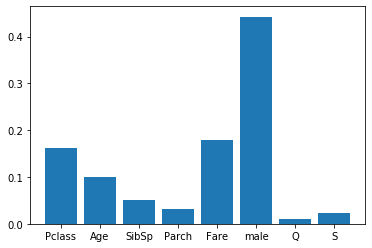

In [46]:
plt.bar( df_train_X.keys(), clf.feature_importances_ )

In [40]:
# 提出用データを処理
X_test = df_test
p_test = clf.predict( X_test )

# 提出用データ作成

In [35]:
"""
# 若干わかりにく
pid = df_test['PassengerId']
df_pred = pd.DataFrame(y_pred, pid, columns = ['Survived'] )
df_pred.to_csv("result.csv", index_label = ["PassengerId"])
"""

'\n# 若干わかりにく\npid = df_test[\'PassengerId\']\ndf_pred = pd.DataFrame(y_pred, pid, columns = [\'Survived\'] )\ndf_pred.to_csv("result.csv", index_label = ["PassengerId"])\n'

In [36]:
df_p_test = pd.DataFrame(p_test, columns= ['Survived'])
df_test_new = pd.concat( [ df_pid_test, df_p_test], axis=1 )

In [37]:
df_submission= df_test_new[['PassengerId' ,'Survived']]
df_submission.to_csv('predictions.csv' , index=False)